In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import datetime
%matplotlib inline

# importing libraries

sns.set()
# set seaborn over matplotlib plotting for better representation

# importing libraries and loading dataset
data = pd.read_csv('datasets/DailyDelhiClimateTrain.csv')

#selecting date column as date time and choosing the date format
data['date']=pd.to_datetime(data['date'], format="%d/%m/%Y")
data.set_index('date',inplace=True)
#removing any null value in the dataset
data.dropna(inplace=True)
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [81]:
#defining large figure size for better understanding
plt.rcParams["figure.figsize"] = [15,10]

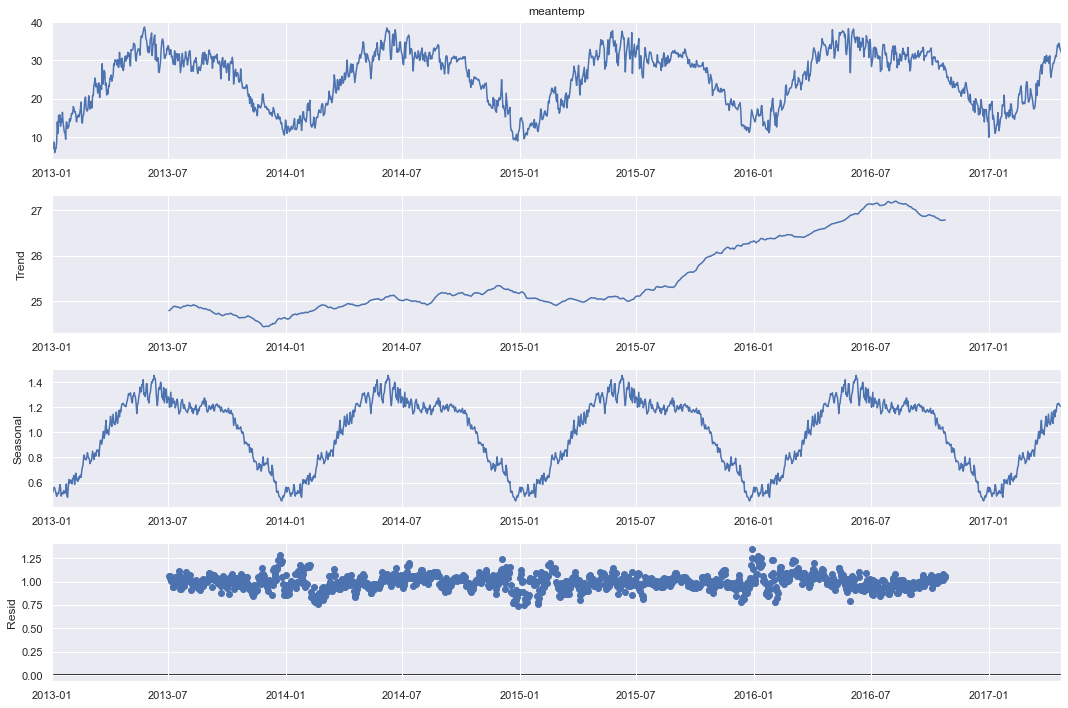

In [82]:
#Plotting the dataset and look for trend, cyclic pattern and variability of the time series

results = seasonal_decompose(x=data['meantemp'], model='multiplicative', period=365)
results.plot();

In [83]:
#data resampling from daily data to monthly data

data = data.resample('MS').mean()
data.index.freq = 'MS'
data.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01'],
              dtype='datetime64[ns]', name='date', freq='MS')

In [84]:
#set test to be 12 month's data

span = 12
alpha = 2/(span+1)

# Simple Exponential Smoothing

data['EWMA12'] = data['meantemp'].ewm(alpha=alpha, adjust=False).mean()
data['SES12'] = SimpleExpSmoothing(data['meantemp']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

# Checking new columns
data.head()
                                                                                                                

,meantemp,humidity,wind_speed,meanpressure,EWMA12,SES12
date,,,,,,
2013-01-01,12.074770,73.028802,4.833913,1017.847734,12.074770,12.074770
2013-02-01,16.867560,71.938563,7.474090,1015.946003,12.812122,12.812122
2013-03-01,22.814209,57.417243,8.757270,1011.733909,14.350905,14.350905
2013-04-01,28.895119,34.612103,8.046385,1006.292341,16.588476,16.588476
2013-05-01,33.776767,28.938249,8.943452,999.924194,19.232828,19.232828


In [85]:
#Double Exponential Smoothing and view new column

data['DESadd12'] = ExponentialSmoothing(data['meantemp'], trend='add').fit().fittedvalues.shift(-1)
data.head()

,meantemp,humidity,wind_speed,meanpressure,EWMA12,SES12,DESadd12
date,,,,,,,
2013-01-01,12.074770,73.028802,4.833913,1017.847734,12.074770,12.074770,16.867559
2013-02-01,16.867560,71.938563,7.474090,1015.946003,12.812122,12.812122,21.660349
2013-03-01,22.814209,57.417243,8.757270,1011.733909,14.350905,14.350905,28.760858
2013-04-01,28.895119,34.612103,8.046385,1006.292341,16.588476,16.588476,34.976029
2013-05-01,33.776767,28.938249,8.943452,999.924194,19.232828,19.232828,38.658414


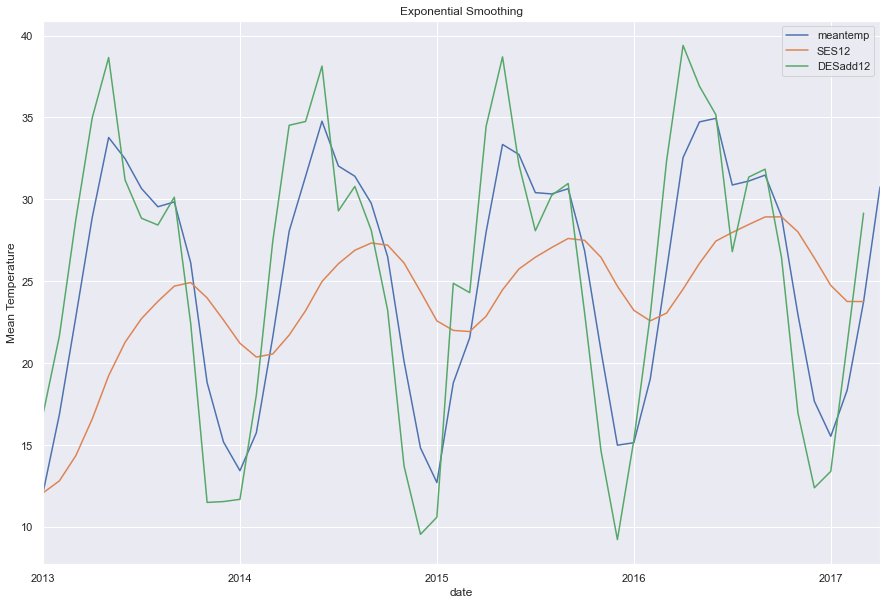

In [92]:
#Plotting simple and Double Exponential Smoothing and view the difference 

data[['meantemp', 'SES12', 'DESadd12']].plot(title='Exponential Smoothing', ylabel='Mean Temperature').autoscale(axis='x', tight=True)

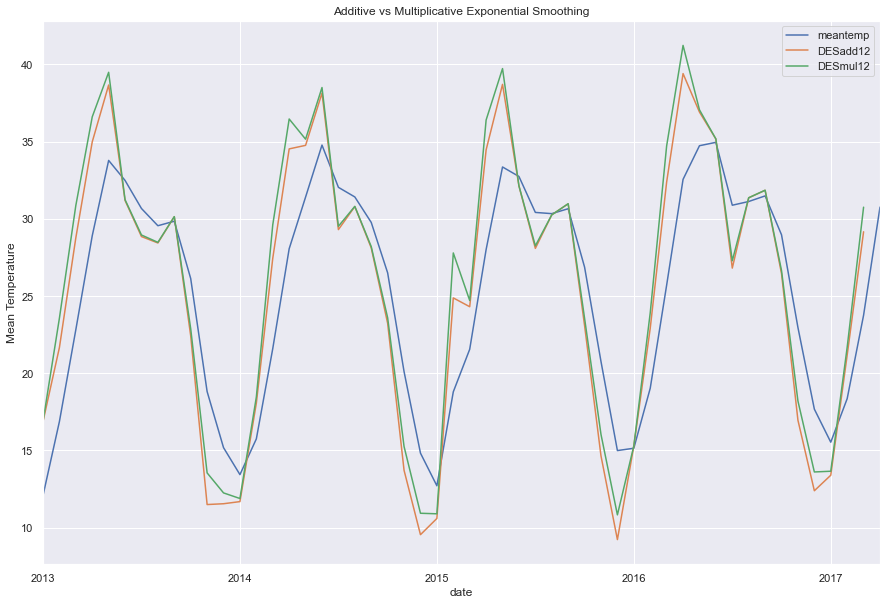

In [87]:
#Plotting Double Exponential Smoothing using additive and multiplicative seasonal adjustment 

data['DESmul12'] = ExponentialSmoothing(data['meantemp'], trend='mul').fit().fittedvalues.shift(-1)
data[['meantemp','DESadd12', 'DESmul12']].plot(title='Additive vs Multiplicative Exponential Smoothing', ylabel='Mean Temperature').autoscale(axis='x', tight=True)


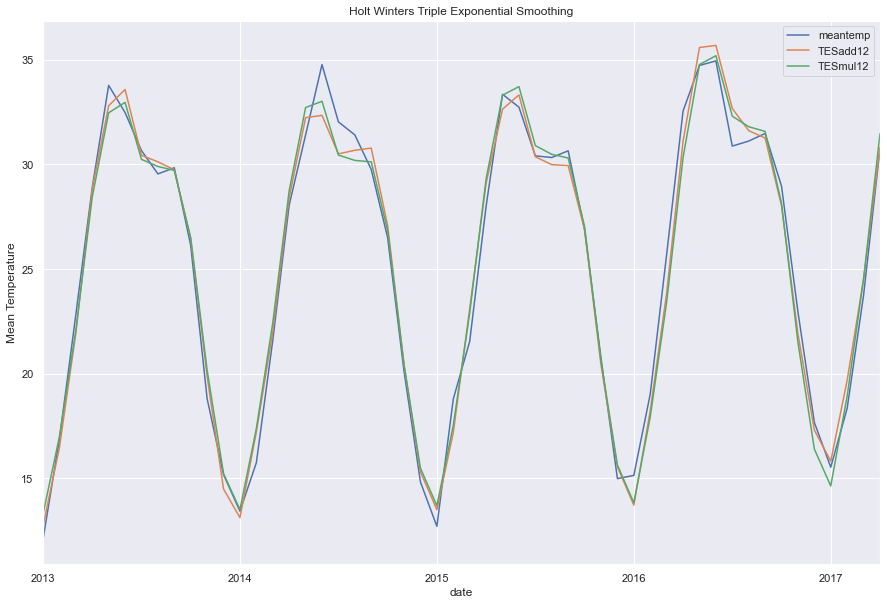

In [88]:
#Plotting Tripple Exponential Smoothing using additive and multiplicative seasonal adjustment 

data['TESadd12'] = ExponentialSmoothing(data['meantemp'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
data['TESmul12'] = ExponentialSmoothing(data['meantemp'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
data[['meantemp', 'TESadd12', 'TESmul12']].plot(title='Holt Winters Triple Exponential Smoothing', ylabel='Mean Temperature').autoscale(axis='x', tight=True)


<AxesSubplot:title={'center':'Forcasting 3 year data based on prediction of our model'}, xlabel='Date', ylabel='Mean Temperature'>

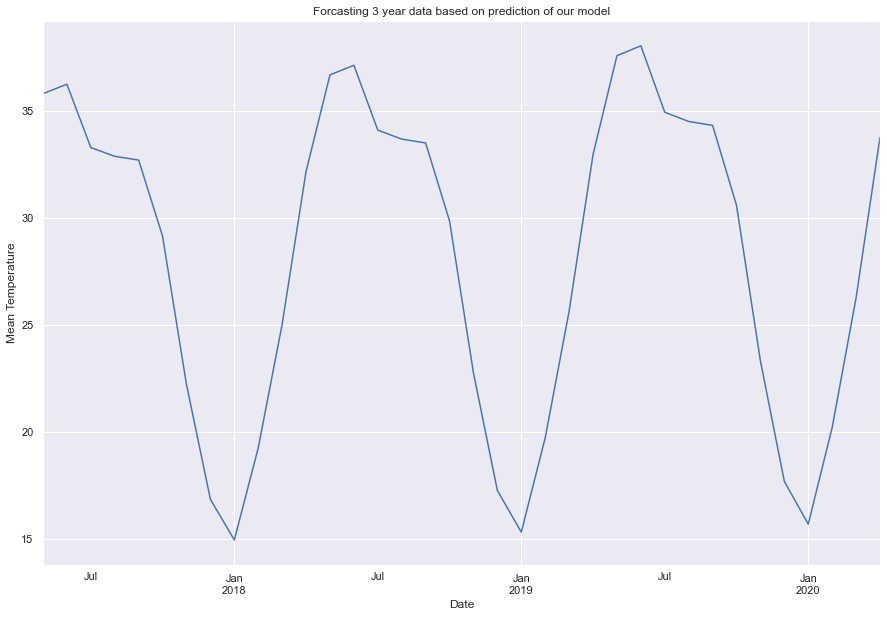

In [89]:
#Prediction using Tripple Exponential Smoothing and Plotting

fitted_model = ExponentialSmoothing(data['meantemp'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(36).rename('HW Forecasting')
test_predictions.plot(title='Forcasting 3 year data based on prediction of our model', ylabel='Mean Temperature', xlabel='Date')

In [90]:
y = data['meantemp']
y_hat = data['TESmul12']

from sklearn.metrics import mean_absolute_error
#importing sklearn library for MAE

#geting Mean Absolute Error by sklearn method

MAE = mean_absolute_error(y, y_hat)

print('Mean Absolute Error', MAE)



Mean Absolute Error 0.8010084911653059
